<a href="https://colab.research.google.com/github/Witcape/PSO/blob/main/Initialization_%26_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing LLM

In [1]:
# !pip install accelerate
# import accelerate

In [2]:
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.78 numpy==1.23.4 --force-reinstall --upgrade --no-cache-dir --verbose
!pip install huggingface_hub
!pip install llama-cpp-python==0.1.78
!pip install numpy==1.23.4

Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.9 MB/s eta 0:00:00
  Running command pip subprocess to install build dependencies
  Using pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)
    Using cached setuptools-70.3.0-py3-none-any.whl (931 kB)
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 2.1 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 25.2 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 22.4 MB/s eta 0:00:00
       ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 4.6 MB/s eta 0:00:00
    Using cached wheel-0.43.0-py3-none-any.whl (65 kB)
    Creating /tmp/pip-build-env-7q_awf00/overlay/local/bin
    changing mode of /tmp/pip-build-env-7q_awf00/overlay/local/bin/ninja to 755
    changing mode of /tmp/pip-build-env-7q_awf00/overlay/local/bin/wheel to 755
    changing mode of /tmp/pip

In [3]:
model_name_or_path = "TheBloke/Llama-2-13B-chat-GGML"
model_basename = "llama-2-13b-chat.ggmlv3.q5_1.bin"

In [4]:
from huggingface_hub import hf_hub_download
from llama_cpp import Llama
import matplotlib.pyplot as plt

In [5]:
model_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


llama-2-13b-chat.ggmlv3.q5_1.bin:   0%|          | 0.00/9.76G [00:00<?, ?B/s]

In [6]:
# GPU
lcpp_llm = None
lcpp_llm = Llama(
    model_path=model_path,
    n_threads=2, # CPU cores
    n_batch=512, # Should be between 1 and n_ctx, consider the amount of VRAM in your GPU.
    n_gpu_layers=32 # Change this value based on your model and your GPU VRAM pool.
    )

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | VSX = 0 | 


In [7]:
lcpp_llm.params.n_gpu_layers

32

### Initialisation using LLM

In [8]:
method =' Quasi-Random Sequence'
prompt = f"generate 20 numbers between -10 to 10 by using {method}, only 2 decimal places, "
prompt_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

USER: {prompt}

ASSISTANT:
'''

In [9]:
response=lcpp_llm(prompt=prompt_template, max_tokens=256, temperature=0.5, top_p=0.95,
                  repeat_penalty=1.2, top_k=150,
                  echo=True)

In [10]:
print(response)

{'id': 'cmpl-012821d5-b980-46ac-a026-221d1acdc71a', 'object': 'text_completion', 'created': 1720759033, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': 'SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\nUSER: generate 20 numbers between -10 to 10 by using  Quasi-Random Sequence, only 2 decimal places, \n\nASSISTANT:\n\nHere is a list of 20 quasi-random numbers between -10 and 10 with two decimal places:\n\n1. -8.47\n2. -5.93\n3. -3.69\n4. -2.25\n5. -1.08\n6. 0.87\n7. 1.78\n8. 2.69\n9. 3.59\n10. 4.47\n11. 5.38\n12. 6.27\n13. 7.15\n14. 8.02\n15. 8.90\n16. 9.77\n17. 10.64\n18. 11.50\n19. 12.35\n20. 13.20\n\nPlease note that these numbers are generated using a Quasi-Random Sequence, which means they may not be perfectly uniform or random, but should still provide a good representation of the range -10 to 10 with 

In [11]:
import re

text_response = response['choices'][0]['text']

# Use a regular expression to find all numbers in the response
numbers = re.findall(r'-?\d+\.\d+', text_response)

# Convert the numbers to floats
numbers = [float(num) for num in numbers]

Quasi_Random_Sequence_Initialisation = numbers
print(Quasi_Random_Sequence_Initialisation)

[-8.47, -5.93, -3.69, -2.25, -1.08, 0.87, 1.78, 2.69, 3.59, 4.47, 5.38, 6.27, 7.15, 8.02, 8.9, 9.77, 10.64, 11.5, 12.35, 13.2]


## Roulette Wheel Selection

###PSO Parameters

In [74]:
!pip install pyswarms
import numpy as np
import pyswarms as ps
# from pso.cost_functions import sphere

In [75]:
# initial_position = np.array(numbers)

# def objective_function(x):
#     return np.sum(x**2)

# bounds = (np.array([-10]), np.array([10]))

# options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

# optimizer = ps.single.GlobalBestPSO(n_particles=len(numbers), dimensions=1, options=options, bounds=bounds, init_pos=initial_position.reshape(-1, 1))

# best_cost, best_pos = optimizer.optimize(objective_function, iters=100)

# print('Best position:', best_pos)
# print('Best objective:', best_cost)


In [76]:
def sphere(x):
    return sum(x**2)

In [77]:
CostFunction = sphere  #
nVar = 10  # Number of Decision Variables
VarSize = (nVar,)  # Size of Decision Variables Matrix
VarMin = -10  # Lower Bound of Variables
VarMax = 10  # Upper Bound of Variables

In [78]:
MaxIt = 20  # Maximum Number of Iterations
nPop = np.size(numbers)  # Population Size (Swarm Size)
print(nPop)

20


In [79]:
w = 1  # Inertia Weight
wdamp = 0.9  # Inertia Weight Damping Ratio
c1 = 1.5  # Personal Learning Coefficient
c2 = 2.0  # Global Learning Coefficient

In [80]:
# Velocity Limits                        HOWW. ASK BHAIYA ABOUT THIS
VelMax = 0.1 * (VarMax - VarMin)
VelMin = -VelMax

In [81]:
particles = []

for i in range(nPop):
    position = np.array([Quasi_Random_Sequence_Initialisation[i]] * nVar)
    velocity = np.zeros(VarSize)
    cost = CostFunction(position)
    best_position = position.copy()
    best_cost = cost
    particles.append({
        'Position': position,
        'Velocity': velocity,
        'Cost': cost,
        'Best': {
            'Position': best_position,
            'Cost': best_cost
        }
    })
print(np.size(particles))

20


In [82]:
GlobalBest = {'Position': None, 'Cost': np.inf}

for p in particles:
    if p['Cost'] < GlobalBest['Cost']:
        GlobalBest = {'Position': p['Best']['Position'].copy(), 'Cost': p['Best']['Cost']}

BestCost = np.zeros(MaxIt)

### Weight W using LLM

In [83]:
w_values = []
g_values = []

for it in range(MaxIt):
    print(f"Iteration {it+1}:")
    for p in particles:
        # Update Velocity
        r1 = np.random.rand(*VarSize)
        r2 = np.random.rand(*VarSize)
        p['Velocity'] = (
            w * p['Velocity']
            + c1 * r1 * (p['Best']['Position'] - p['Position'])
            + c2 * r2 * (GlobalBest['Position'] - p['Position'])
        )

        # Apply Velocity Limits
        p['Velocity'] = np.maximum(p['Velocity'], VelMin)
        p['Velocity'] = np.minimum(p['Velocity'], VelMax)

        # Update Position
        p['Position'] += p['Velocity']

        # Velocity Mirror Effect
        IsOutside = (p['Position'] < VarMin) | (p['Position'] > VarMax)
        p['Velocity'][IsOutside] = -p['Velocity'][IsOutside]

        # Apply Position Limits
        p['Position'] = np.maximum(p['Position'], VarMin)
        p['Position'] = np.minimum(p['Position'], VarMax)

        # Evaluation
        p['Cost'] = CostFunction(p['Position'])

        # Update Personal Best
        if p['Cost'] < p['Best']['Cost']:
            p['Best']['Position'] = p['Position'].copy()
            p['Best']['Cost'] = p['Cost']

        print(p['Best']['Cost'])

    costs = [p['Best']['Cost'] for p in particles]
    costs.append(GlobalBest['Cost'])
    min_cost = min(costs)
    min_p_best = min([p['Best']['Cost'] for p in particles])

    prompt = f"I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including ({GlobalBest['Cost']}) and ({min_p_best}). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally."
    g_best_finder_template = f'''SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.

    USER: {prompt}

    ASSISTANT:
    '''

    g_best_response = lcpp_llm(prompt=g_best_finder_template, max_tokens=256, temperature=0.5, top_p=0.95,
                              repeat_penalty=1.2, top_k=150,
                              echo=True)
    print(g_best_response)
    g_best_response = g_best_response['choices'][0]['text']
    g_best_value = re.findall(r'-?\d+\.\d+', g_best_response)
    g_best_value = [float(num) for num in g_best_value]
    g_best_value = g_best_value[-1]  # Select the last value in case there are multiple
    print(g_best_value)
    g_values.append(g_best_value)

    if g_best_value < GlobalBest['Cost']:
        for p in particles:
            if p['Best']['Cost'] == g_best_value:
                GlobalBest['Position'] = p['Best']['Position'].copy()
                GlobalBest['Cost'] = g_best_value
                break

    BestCost[it] = GlobalBest['Cost']

    print(f"Iteration {it+1}: Best Cost = {BestCost[it]}")

    w *= wdamp
    w_values.append(w)

# Print final values
Roulette_wheel_g_values = g_values
print("w_values:", w_values)
print("Roulette_wheel_g_values:", Roulette_wheel_g_values)

Iteration 1:
456.2914058351662
178.94117167179482
28.79897616095471
5.668145511617947
6.721590065926354
7.569
12.260712429084176
21.303577502332157
47.355268375830946
86.91173447124959
134.6327433436064
225.77147881983674
304.2324399269512
386.69635020190526
481.254432709382
603.7289999999999
746.496
902.5
1000.0
1000.0


Llama.generate: prefix-match hit


{'id': 'cmpl-d4b6ae95-2850-4523-a093-59f18a61bd0b', 'object': 'text_completion', 'created': 1720760846, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (7.569) and (5.668145511617947). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best is 5.668145511617947.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 139, 'completion_tokens': 25, 'total_tokens': 164}}
5.668145511617947
Iteration 1

Llama.generate: prefix-match hit


{'id': 'cmpl-b7e98c8c-e224-44b5-917c-225b16f11a7d', 'object': 'text_completion', 'created': 1720760869, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (5.668145511617947) and (1.423840828032725). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    1.423840828032725", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 151, 'completion_tokens': 17, 'total_tokens': 168}}
1.423840828032725
Iteration 2: Best Cost = 1.42384

Llama.generate: prefix-match hit


{'id': 'cmpl-3f179b84-6a0d-4ca7-b0e7-671680c0c182', 'object': 'text_completion', 'created': 1720760877, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (1.423840828032725) and (1.423840828032725). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    1.423840828032725", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 151, 'completion_tokens': 17, 'total_tokens': 168}}
1.423840828032725
Iteration 3: Best Cost = 1.42384

Llama.generate: prefix-match hit


{'id': 'cmpl-afc78e02-0950-4e55-999b-e36866078b99', 'object': 'text_completion', 'created': 1720760886, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (1.423840828032725) and (1.423840828032725). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    1.423840828032725", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 151, 'completion_tokens': 17, 'total_tokens': 168}}
1.423840828032725
Iteration 4: Best Cost = 1.42384

Llama.generate: prefix-match hit


{'id': 'cmpl-748a1875-1468-454d-9337-7c27fd283da7', 'object': 'text_completion', 'created': 1720760892, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (1.423840828032725) and (0.36769526645159933). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on the information provided, the new minimum global best value is (0.36769526645159933).", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 153, 'completion_token

Llama.generate: prefix-match hit


{'id': 'cmpl-002bff06-37c2-48a0-9c7f-5d0f06adaa13', 'object': 'text_completion', 'created': 1720760908, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.36769526645159933) and (0.36769526645159933). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.36769526645159933", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tokens': 19, 'total_tokens': 174}}
0.36769526645159933
Iteration 6: Best Cost =

Llama.generate: prefix-match hit


{'id': 'cmpl-0cd33c4a-13c6-4bef-9221-4abee707ccd7', 'object': 'text_completion', 'created': 1720760917, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.36769526645159933) and (0.36769526645159933). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.36769526645159933", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tokens': 19, 'total_tokens': 174}}
0.36769526645159933
Iteration 7: Best Cost =

Llama.generate: prefix-match hit


{'id': 'cmpl-2d438bbc-a8b1-4c31-9f62-5a84dcc24084', 'object': 'text_completion', 'created': 1720760925, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.36769526645159933) and (0.36769526645159933). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.36769526645159933", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tokens': 19, 'total_tokens': 174}}
0.36769526645159933
Iteration 8: Best Cost =

Llama.generate: prefix-match hit


{'id': 'cmpl-01d8651e-6f47-4aa6-89b2-333aad7c5cf7', 'object': 'text_completion', 'created': 1720760934, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.36769526645159933) and (0.36769526645159933). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.36769526645159933", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tokens': 19, 'total_tokens': 174}}
0.36769526645159933
Iteration 9: Best Cost =

Llama.generate: prefix-match hit


{'id': 'cmpl-45f04d24-4acf-4546-88dc-7e64fcfecd85', 'object': 'text_completion', 'created': 1720760940, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.36769526645159933) and (0.36769526645159933). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.36769526645159933", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tokens': 19, 'total_tokens': 174}}
0.36769526645159933
Iteration 10: Best Cost 

Llama.generate: prefix-match hit


{'id': 'cmpl-a7625ea6-2fa6-4d7a-b735-c7586c5f9672', 'object': 'text_completion', 'created': 1720760949, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.36769526645159933) and (0.36769526645159933). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n    0.36769526645159933", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tokens': 19, 'total_tokens': 174}}
0.36769526645159933
Iteration 11: Best Cost 

Llama.generate: prefix-match hit


{'id': 'cmpl-b5e49837-9a5a-4824-944f-13376f088d8d', 'object': 'text_completion', 'created': 1720760960, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.36769526645159933) and (0.3595359430081667). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on your input, I would suggest using (0.3595359430081667) as the new minimum global best value for your cost function.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_

Llama.generate: prefix-match hit


{'id': 'cmpl-a59c8fec-d023-4d12-88f2-0247c44d4658', 'object': 'text_completion', 'created': 1720760977, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.3595359430081667) and (0.32927416075604277). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best is 0.32927416075604277.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 154, 'completion_tokens': 27, 'total_tokens': 181}}
0.3292741607

Llama.generate: prefix-match hit


{'id': 'cmpl-078ac7fe-0543-44d5-99c2-28855e795e7c', 'object': 'text_completion', 'created': 1720760990, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.32927416075604277) and (0.32303193659006935). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on the information provided, the new minimum global best value is (0.32303193659006935).", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tok

Llama.generate: prefix-match hit


{'id': 'cmpl-fad4ac05-59a2-42a4-a732-af790eb8c4ad', 'object': 'text_completion', 'created': 1720761005, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.32303193659006935) and (0.21041004007940498). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on the information you provided, the new minimum global best value is (0.21041004007940498).", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion

Llama.generate: prefix-match hit


{'id': 'cmpl-5dd37a8b-146c-460b-b779-8a448a094117', 'object': 'text_completion', 'created': 1720761020, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.21041004007940498) and (0.17569373438535993). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best value is 0.17569373438535993.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tokens': 28, 'total_tokens': 183}}
0.175

Llama.generate: prefix-match hit


{'id': 'cmpl-45a92415-e053-4b23-a7f2-43e7c5a02b30', 'object': 'text_completion', 'created': 1720761033, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.17569373438535993) and (0.13429265735876672). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     The new minimum global best value is 0.13429265735876672.", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tokens': 28, 'total_tokens': 183}}
0.134

Llama.generate: prefix-match hit


{'id': 'cmpl-24913875-05c5-4fe7-9a16-e697369688b1', 'object': 'text_completion', 'created': 1720761045, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.13429265735876672) and (0.12385013906906855). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on the information provided, the new minimum global best value is (0.12385013906906855).", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tok

Llama.generate: prefix-match hit


{'id': 'cmpl-db0552c3-8c35-4e1b-913d-53ff0d3c4e06', 'object': 'text_completion', 'created': 1720761061, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.12385013906906855) and (0.10496699851643432). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on the information provided, the new minimum global best value is (0.10496699851643432).", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 155, 'completion_tok

Llama.generate: prefix-match hit


{'id': 'cmpl-b0278fd6-0bb8-40b4-af6d-c53d87d13b26', 'object': 'text_completion', 'created': 1720761077, 'model': '/root/.cache/huggingface/hub/models--TheBloke--Llama-2-13B-chat-GGML/snapshots/3140827b4dfcb6b562cd87ee3d7f07109b014dd0/llama-2-13b-chat.ggmlv3.q5_1.bin', 'choices': [{'text': "SYSTEM: You are a helpful, respectful, and honest assistant. Always answer as helpfully.\n\n    USER: I am using the Particle Swarm Optimization (PSO) algorithm to minimize the cost function. I have multiple cost values from particles in my swarm, including (0.10496699851643432) and (0.0905570766756201). Using the Roulette_wheel, determine which of these values should be the new minimum global best. Don't write anything else, just write that number in decimal notation normally.\n\n    ASSISTANT:\n     Based on your input, I would suggest using (0.0905570766756201) as the new minimum global best value from the PSO algorithm. ", 'index': 0, 'logprobs': None, 'finish_reason': 'stop'}], 'usage': {'prompt

In [84]:
print(w_values)

[0.9, 0.81, 0.7290000000000001, 0.6561000000000001, 0.5904900000000002, 0.5314410000000002, 0.47829690000000014, 0.43046721000000016, 0.38742048900000015, 0.34867844010000015, 0.31381059609000017, 0.28242953648100017, 0.25418658283290013, 0.22876792454961012, 0.2058911320946491, 0.1853020188851842, 0.16677181699666577, 0.1500946352969992, 0.13508517176729928, 0.12157665459056936]


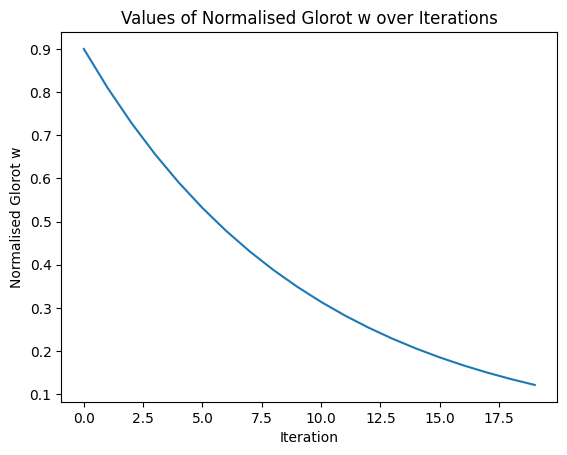

In [85]:
Roulette_Glorot_weights = w_values
plt.plot(Roulette_Glorot_weights)
plt.xlabel("Iteration")
plt.ylabel("Normalised Glorot w")
plt.title("Values of Normalised Glorot w over Iterations")
plt.show()

[5.668145511617947, 1.423840828032725, 1.423840828032725, 1.423840828032725, 0.36769526645159933, 0.36769526645159933, 0.36769526645159933, 0.36769526645159933, 0.36769526645159933, 0.36769526645159933, 0.36769526645159933, 0.3595359430081667, 0.32927416075604277, 0.32303193659006935, 0.21041004007940498, 0.17569373438535993, 0.13429265735876672, 0.12385013906906855, 0.10496699851643432, 0.0905570766756201]


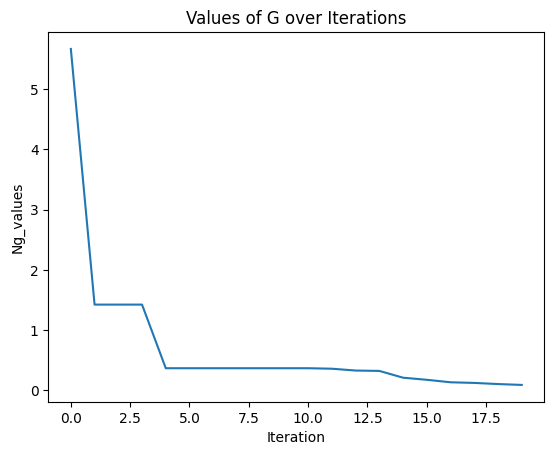

In [86]:
Roulette_Glorot_g_values = g_values

print(g_values)

plt.plot(Roulette_Glorot_g_values)
plt.xlabel("Iteration")
plt.ylabel("Ng_values")
plt.title("Values of G over Iterations")
plt.show()